# Simple Harmonic Motion
(w/ an emphasis on least-squares fitting)

<center>George Luan 05/2022

Lab Mates: Anthony Baselious and Angela Wang

One way to analyze this system is by obtaining a function that fits the data. Since simple harmonic motion has a sinusoidal profile, we will try to find the best fit sinusoidal function.

This analysis uses the data collected during our class experiment. You can access it here https://drive.google.com/drive/folders/1vgbLOs9mLn3obSv6OClIVzYCKC_yIPqC?usp=sharing.

## Importing Data and Packages

In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
from scipy.optimize import least_squares
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Read in your time and position data
read_in_array = np.loadtxt('/content/drive/MyDrive/Accelerometer Calibration/4 27/occilation_data.txt',skiprows=1,delimiter=',')
read_in_array_x = np.loadtxt('/content/drive/MyDrive/Accelerometer Calibration/4 27/-x.txt', delimiter=',')
read_in_array_y = np.loadtxt('/content/drive/MyDrive/Accelerometer Calibration/4 27/-y.txt', delimiter= ',')

## Define Functions

The two functions below are used to calculate accelerations.

In [ ]:
def calibrate_accelerometer(x1, y1, x2, y2):
  slope = (y2 - y1)/(x2 - x1)
  intercept = y1 - slope*x1
  return np.array([slope, intercept])

In [ ]:
def calculate_acceleration(cali, input_analog):
  """ The total acceleration can be found using the calibration equation determined by calibrate_accelerometer(x1, y1, x2, y2).
      The relative acceleration can be found by subtracting the acceleration due to gravity from the total acceleration. 
      Since the accelerometer was mounted upside down, the acceleration due to the effect of gravity was 9.81 m/s^2.
  """
  return input_analog*cali[0] + cali[1] - 9.81 

We define a function that can generate a sine wave based on the four parameters in consideration (shown below).
$$x(t) = A\sin(\omega t + \phi)+offset$$

In [ ]:
def sin_fit_fun(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.sin(omega * time + phi) + offset
  return y

We define another function called get_residuals. The purpose of this function is to take in the following inputs - the original data and the parameters for the guessed function. This function will then provide us with residuals or the differences between the observed and predicted values.

In [ ]:
def get_residuals(parameters, data, x):
  residuals = np.abs(data - sin_fit_fun(parameters, x))
  return -residuals

## Calculate Accelerations

In [ ]:
x_cali = calibrate_accelerometer(np.mean(read_in_array_y[:,2]), 0, np.mean(read_in_array_x[:,2]), -9.81)
x_cali

array([ 0.0006348 , -0.16708029])

In [ ]:
np.mean(read_in_array_x[:,2])

-15190.4

In [ ]:
acceleration = calculate_acceleration(x_cali, read_in_array[:,2])

In [ ]:
time_data = read_in_array[:, 0]/1000
ultrasound = read_in_array[:, 1]/100

## Data Prep

Plot the position vs index data

Text(0.5, 1.0, 'Index Plot')

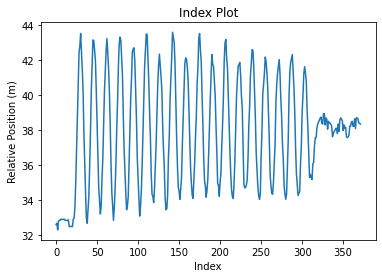

In [ ]:
plt.plot(read_in_array[:, 1])
# Axis labels
plt.xlabel('Index')
plt.ylabel('Relative Position (m)')

# Title
plt.title('Index Plot')


Clip the data so that the phase is 0

In [ ]:
start_index = 138
end_index = 188

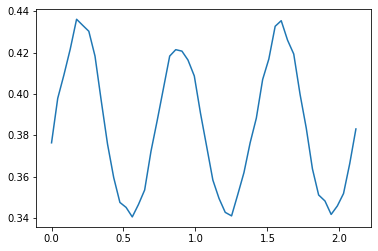

In [ ]:
# define the starting time

# Clip the data
ultrasound_window = ultrasound[start_index:end_index]
elapsed_time_window = time_data[start_index:end_index] - time_data[start_index]


# Make a plot
plt.plot(elapsed_time_window, ultrasound_window)


## Modeling for Position vs Time

In [ ]:
# Make the guess parameters 

# Guess a
guess_a = 0.05 
# guess omega
guess_omega = 9.24
# guess phi = 0
guess_phi = 0
# Guess offset
guess_offset = 0.38
guess_parameters = [guess_a, guess_omega, guess_offset, guess_phi]

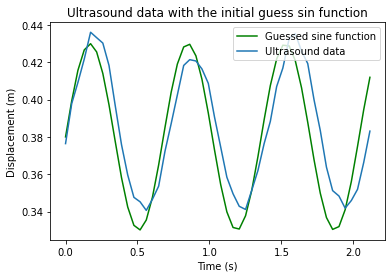

In [ ]:
# Create a sin function based on original guess parameters
theoretical_guess_function = sin_fit_fun(guess_parameters, elapsed_time_window)

# Plot the guess function
plt.plot(elapsed_time_window, theoretical_guess_function,color="green",label="Guessed sine function")

# Plot the original data
plt.plot(elapsed_time_window, ultrasound_window, label="Ultrasound data")

plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Ultrasound data with the initial guess sin function")
plt.legend()

In [ ]:
# Perform least squares
# The imported least_squares function minimizes the residuals
res_lsq = least_squares(get_residuals, guess_parameters, 
args=(ultrasound_window,elapsed_time_window))

# We store the values of best possible paremeters obtained for amplitude, omega, offset and phase in best_parameters
best_parameters = res_lsq['x']


In [ ]:
# Print out best parameters
print('Best Amplitude: ' + str(best_parameters[0]))
print('Best Omega: ' + str(best_parameters[1]))
print('Best offset: ' + str(best_parameters[2]))
print('Best Phi: ' + str(best_parameters[3]))

Best Amplitude: 0.04453413295689727
Best Omega: 9.020707565320304
Best offset: 0.3849902325348817
Best Phi: -0.19261077115321718


Text(0.5, 1.0, 'Ultrasound data with the best fit sine function')

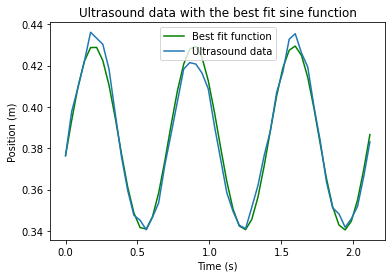

In [ ]:
# Plot the fit
fitted_function = sin_fit_fun(best_parameters, elapsed_time_window)

plt.plot(elapsed_time_window, fitted_function, color = 'green', label="Best fit function")

# Plot the data
plt.plot(elapsed_time_window, ultrasound_window,label="Ultrasound data")

# Legend
plt.legend()
# axis labels
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
#title
plt.title("Ultrasound data with the best fit sine function")


## Calculate the acceleration

### Derive the Acceleration Function

In [ ]:
# The differentiation can be done by hand and then typed into code
# vel_fit is the velocity as a function of time
vel_fit = best_parameters[0]*best_parameters[1]*np.cos(best_parameters[1]*elapsed_time_window+best_parameters[3])

# acc_fit is the acceleration as a function of time
acc_fit = -best_parameters[0]*(best_parameters[1]**2)*np.sin(best_parameters[1]*elapsed_time_window+best_parameters[3])

In [ ]:
# Define the time window
acc_window = acceleration[start_index:end_index]

Text(0.5, 1.0, 'Acceleration vs. Time')

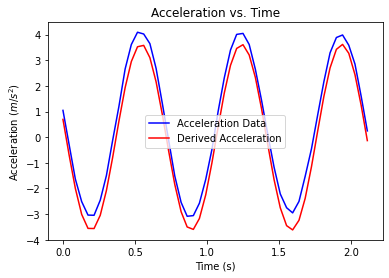

In [ ]:
plt.plot(elapsed_time_window,acc_window,color="blue", label="Acceleration Data")
plt.plot(elapsed_time_window,acc_fit,color= "red", label="Derived Acceleration")
#plt.plot(elapsed_time_window,fitted_function_acc,color="green", label="Fitted Acceleration")
# Provide a title to the plot
plt.title('Ultrasound data for simple harmonic motion')

# Label the y-axis
plt.ylabel('Acceleration ($m/s^2$)')

# Label the x-axis
plt.xlabel('Time (s)')

#Provide the legend
plt.legend()

#Title
plt.title("Acceleration vs. Time")

### Using Least-squares to Fit an Acceleration Model

In [ ]:
guess_parameters = [guess_a*guess_omega*guess_omega, guess_omega, guess_offset, guess_phi]

In [ ]:
res_lsq_acc = least_squares(get_residuals, guess_parameters, 
args=(acc_window,elapsed_time_window))

# We store the values of best possible paremeters obtained for amplitude, omega, offset and phase in best_parameters
best_parameters_acc = res_lsq_acc['x']
# Generate fitted acceleration
fitted_function_acc = sin_fit_fun(best_parameters_acc, elapsed_time_window)

Text(0.5, 1.0, 'Acceleration (Fitted) vs. Time')

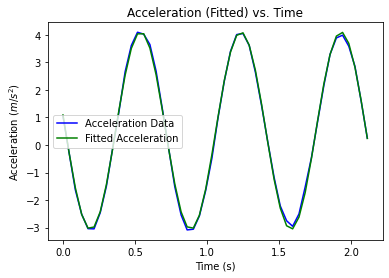

In [ ]:
plt.plot(elapsed_time_window,acc_window,color="blue", label="Acceleration Data")
#plt.plot(elapsed_time_window,acc_fit,color= "red", label="Derived Acceleration")
plt.plot(elapsed_time_window,fitted_function_acc,color="green", label="Fitted Acceleration")
# Provide a title to the plot
plt.title('Ultrasound data for simple harmonic motion')

# Label the y-axis
plt.ylabel('Acceleration ($m/s^2$)')

# Label the x-axis
plt.xlabel('Time (s)')

#Provide the legend
plt.legend()

#Title
plt.title("Acceleration (Fitted) vs. Time")

### Calculate the Energy Quantities

In [ ]:
KE = 0.5 * 0.211 * np.multiply(vel_fit, vel_fit)
PE = 0.5 * 18.1481 * np.multiply((fitted_function - best_parameters[2]), (fitted_function - best_parameters[2]))

Text(0.5, 1.0, 'Acceleration (Derived) vs. Time')

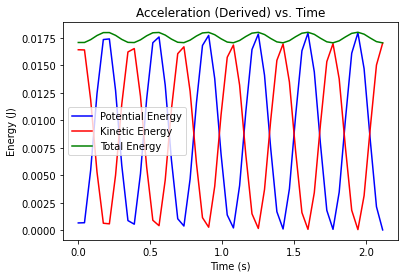

In [ ]:
plt.plot(elapsed_time_window,PE,color="blue", label="Potential Energy")
plt.plot(elapsed_time_window,KE,color= "red", label="Kinetic Energy")
plt.plot(elapsed_time_window,KE+PE,color= "green", label="Total Energy")

#plt.plot(elapsed_time_window,fitted_function_acc,color="green", label="Fitted Acceleration")
# Provide a title to the plot
plt.title('Ultrasound data for simple harmonic motion')

# Label the y-axis
plt.ylabel('Energy (J)')

# Label the x-axis
plt.xlabel('Time (s)')

#Provide the legend
plt.legend()

#Title
plt.title("Acceleration (Derived) vs. Time")

Desipte the subtle fluctuations, we can conclude from the fairly constant total energy graph that the mechanical energy is conserved in the experiment.

## Numerical Differentiation
We also tried to calculate the acceleration by applying numerical differentiation twice on the relative position vs. time data.

In [ ]:
numerical_vel = np.gradient(ultrasound_window, elapsed_time_window)

In [ ]:
numerical_acceleration = np.gradient(numerical_vel, elapsed_time_window)

Text(0.5, 1.0, 'Acceleration (Numerical) vs. Time')

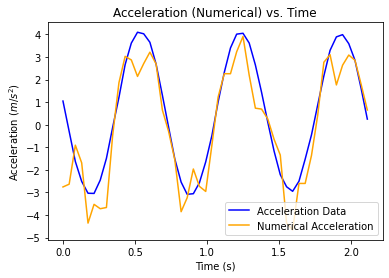

In [ ]:
plt.plot(elapsed_time_window,acc_window,color="blue", label="Acceleration Data")
plt.plot(elapsed_time_window,numerical_acceleration,color= "orange", label="Numerical Acceleration")
#plt.plot(elapsed_time_window,fitted_function_acc,color="green", label="Fitted Acceleration")
# Provide a title to the plot
plt.title('Ultrasound data for simple harmonic motion')

# Label the y-axis
plt.ylabel('Acceleration ($m/s^2$)')
plt.yticks(np.arange(-5, 5, 1.0))

# Label the x-axis
plt.xlabel('Time (s)')

#Provide the legend
plt.legend()

#Title
plt.title("Acceleration (Numerical) vs. Time")

From the above graph, we can conclude that numerical differentiation is not accurate enough for our purpose.